## Exploratory data analysis (EDA)
Explanatory and exploratory analysis on residential homes in Ames, Iowa. Exploring and identifying key markers in determining the final price of homes as a Data Scientist

PREPARATION FOR DATA ASSESSMENT BY INSTALLING LIBRARIES

In [6]:
#!pip install -U ydata-profiling

In [7]:
# Importing relevant libraries for data preparation
# Data Virtualization 
import matplotlib.pyplot as plt
import seaborn as sns
# Data Analysis
import pandas as pd
import numpy as np
from collections import Counter
plt.style.use('bmh')
import warnings
warnings.filterwarnings('ignore')

#### DATA ASSESSMENT

In [8]:
# Reading Data
df= pd.read_csv(r"C:\Users\DELL PRO\Downloads\train.csv")
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [5]:
#Data first 5 rows
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [9]:
# Data Summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
# Cheching for missing features
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [12]:
# Checking for duplicate features
df.duplicated().sum()

0

In [13]:
# Statistical description of numerical features
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [17]:
# Statistical description of categorical features
df.describe(exclude=np.number)

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1  ... GarageType GarageFinish  \
count       1460         1460       1460  ...       1379         1379   
unique         3           25          9  ...          6            3   
top          Gtl        NAmes       Norm  ...     Attchd          Unf   
freq        1382          225       1260  ...        870          605   

       GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType  \
count        1379       1379       1460      7    281          54     1460   
unique          5          5          3      3      4           4        9   
top            TA         TA          Y     Gd  MnPrv        Shed       WD   
freq         1311       1326       1340      3    157          49     1267   

       SaleCondition  
count           1460  
unique             6  
top           Normal  
freq            1198  

[4 rows x 43 columns]

#### DATA CLEANING
From the observations in data summary. There are presence of redundant features to be cleaned out in the data by dropping off redundant features that have more than 30% data points missing with id column


In [21]:
# Identifying features that have above 30% of missing data
df.isnull().mean() <= (1 - 0.3)

Id               True
MSSubClass       True
MSZoning         True
LotFrontage      True
LotArea          True
                 ... 
MoSold           True
YrSold           True
SaleType         True
SaleCondition    True
SalePrice        True
Length: 81, dtype: bool

In [10]:
# Checking and locating features above 30% missing data
df2= df.loc[:, df.isnull().mean() <= (1 - 0.3)]
df2

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0        1          60       RL         65.0     8450   Pave      Reg   
1        2          20       RL         80.0     9600   Pave      Reg   
2        3          60       RL         68.0    11250   Pave      IR1   
3        4          70       RL         60.0     9550   Pave      IR1   
4        5          60       RL         84.0    14260   Pave      IR1   
...    ...         ...      ...          ...      ...    ...      ...   
1455  1456          60       RL         62.0     7917   Pave      Reg   
1456  1457          20       RL         85.0    13175   Pave      Reg   
1457  1458          70       RL         66.0     9042   Pave      Reg   
1458  1459          20       RL         68.0     9717   Pave      Reg   
1459  1460          20       RL         75.0     9937   Pave      Reg   

     LandContour Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0            Lvl    AllPub    Inside  ...             0         0           0   
1            Lvl    AllPub       FR2  ...             0         0           0   
2            Lvl    AllPub    Inside  ...             0         0           0   
3            Lvl    AllPub    Corner  ...           272         0           0   
4            Lvl    AllPub       FR2  ...             0         0           0   
...          ...       ...       ...  ...           ...       ...         ...   
1455         Lvl    AllPub    Inside  ...             0         0           0   
1456         Lvl    AllPub    Inside  ...             0         0           0   
1457         Lvl    AllPub    Inside  ...             0         0           0   
1458         Lvl    AllPub    Inside  ...           112         0           0   
1459         Lvl    AllPub    Inside  ...             0         0           0   

     PoolArea MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0           0       0      2    2008        WD         Normal     208500  
1           0       0      5    2007        WD         Normal     181500  
2           0       0      9    2008        WD         Normal     223500  
3           0       0      2    2006        WD        Abnorml     140000  
4           0       0     12    2008        WD         Normal     250000  
...       ...     ...    ...     ...       ...            ...        ...  
1455        0       0      8    2007        WD         Normal     175000  
1456        0       0      2    2010        WD         Normal     210000  
1457        0    2500      5    2010        WD         Normal     266500  
1458        0       0      4    2010        WD         Normal     142125  
1459        0       0      6    2008        WD         Normal     147500  

[1460 rows x 77 columns]

In [87]:
# Dropping off the redundant features
df2= df2.drop('Id', axis= 1)

In [32]:
# Identifying dropped features
for i in df.columns:
    if i not in df2.columns:
        print(f'dropped columns: {i}')

dropped columns: Id
dropped columns: Alley
dropped columns: PoolQC
dropped columns: Fence
dropped columns: MiscFeature


In [36]:
# Identifying relevant columns
df2.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

#### Exploratory Data Analysis
- Use visualization techniques to explore data
- Carry out Univariate, Biariate and Multivariate Visusalization analysis

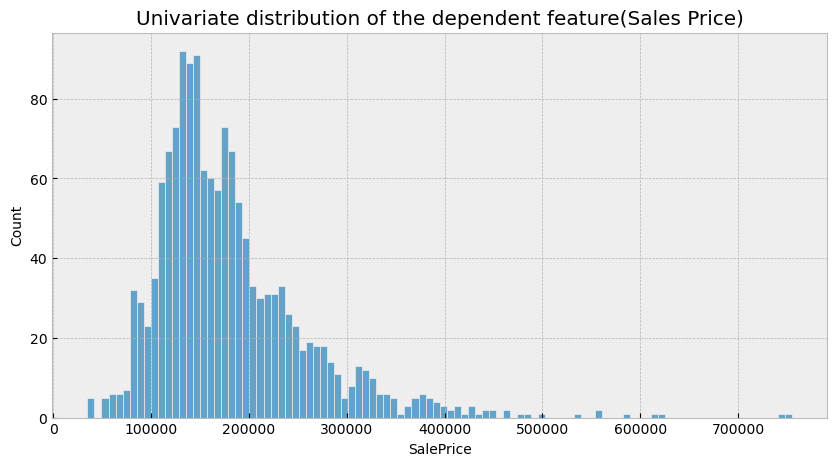

In [42]:
fig,ax = plt.subplots(figsize=(10,5))
sns.histplot(x='SalePrice', data= df2, bins=100)
ax.set_title('Univariate distribution of the dependent feature(Sales Price)');

The distribution of sales price shows that it is positive skewed.
Outliers are observed at above the price of 500000

In [11]:
#creating categorical and numerical features for data analysis
num_ri_cal_featrs = df2.select_dtypes(include = ['float64', 'int64'])
cate_gori_cal_featrs = df2.select_dtypes(include='object')
num_ri_cal_featrs.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706  ...           0           61   
1          1976         0.0         978  ...         298            0   
2          2002       162.0         486  ...           0           42   
3          1970         0.0         216  ...           0           35   
4          2000       350.0         655  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 38 columns]

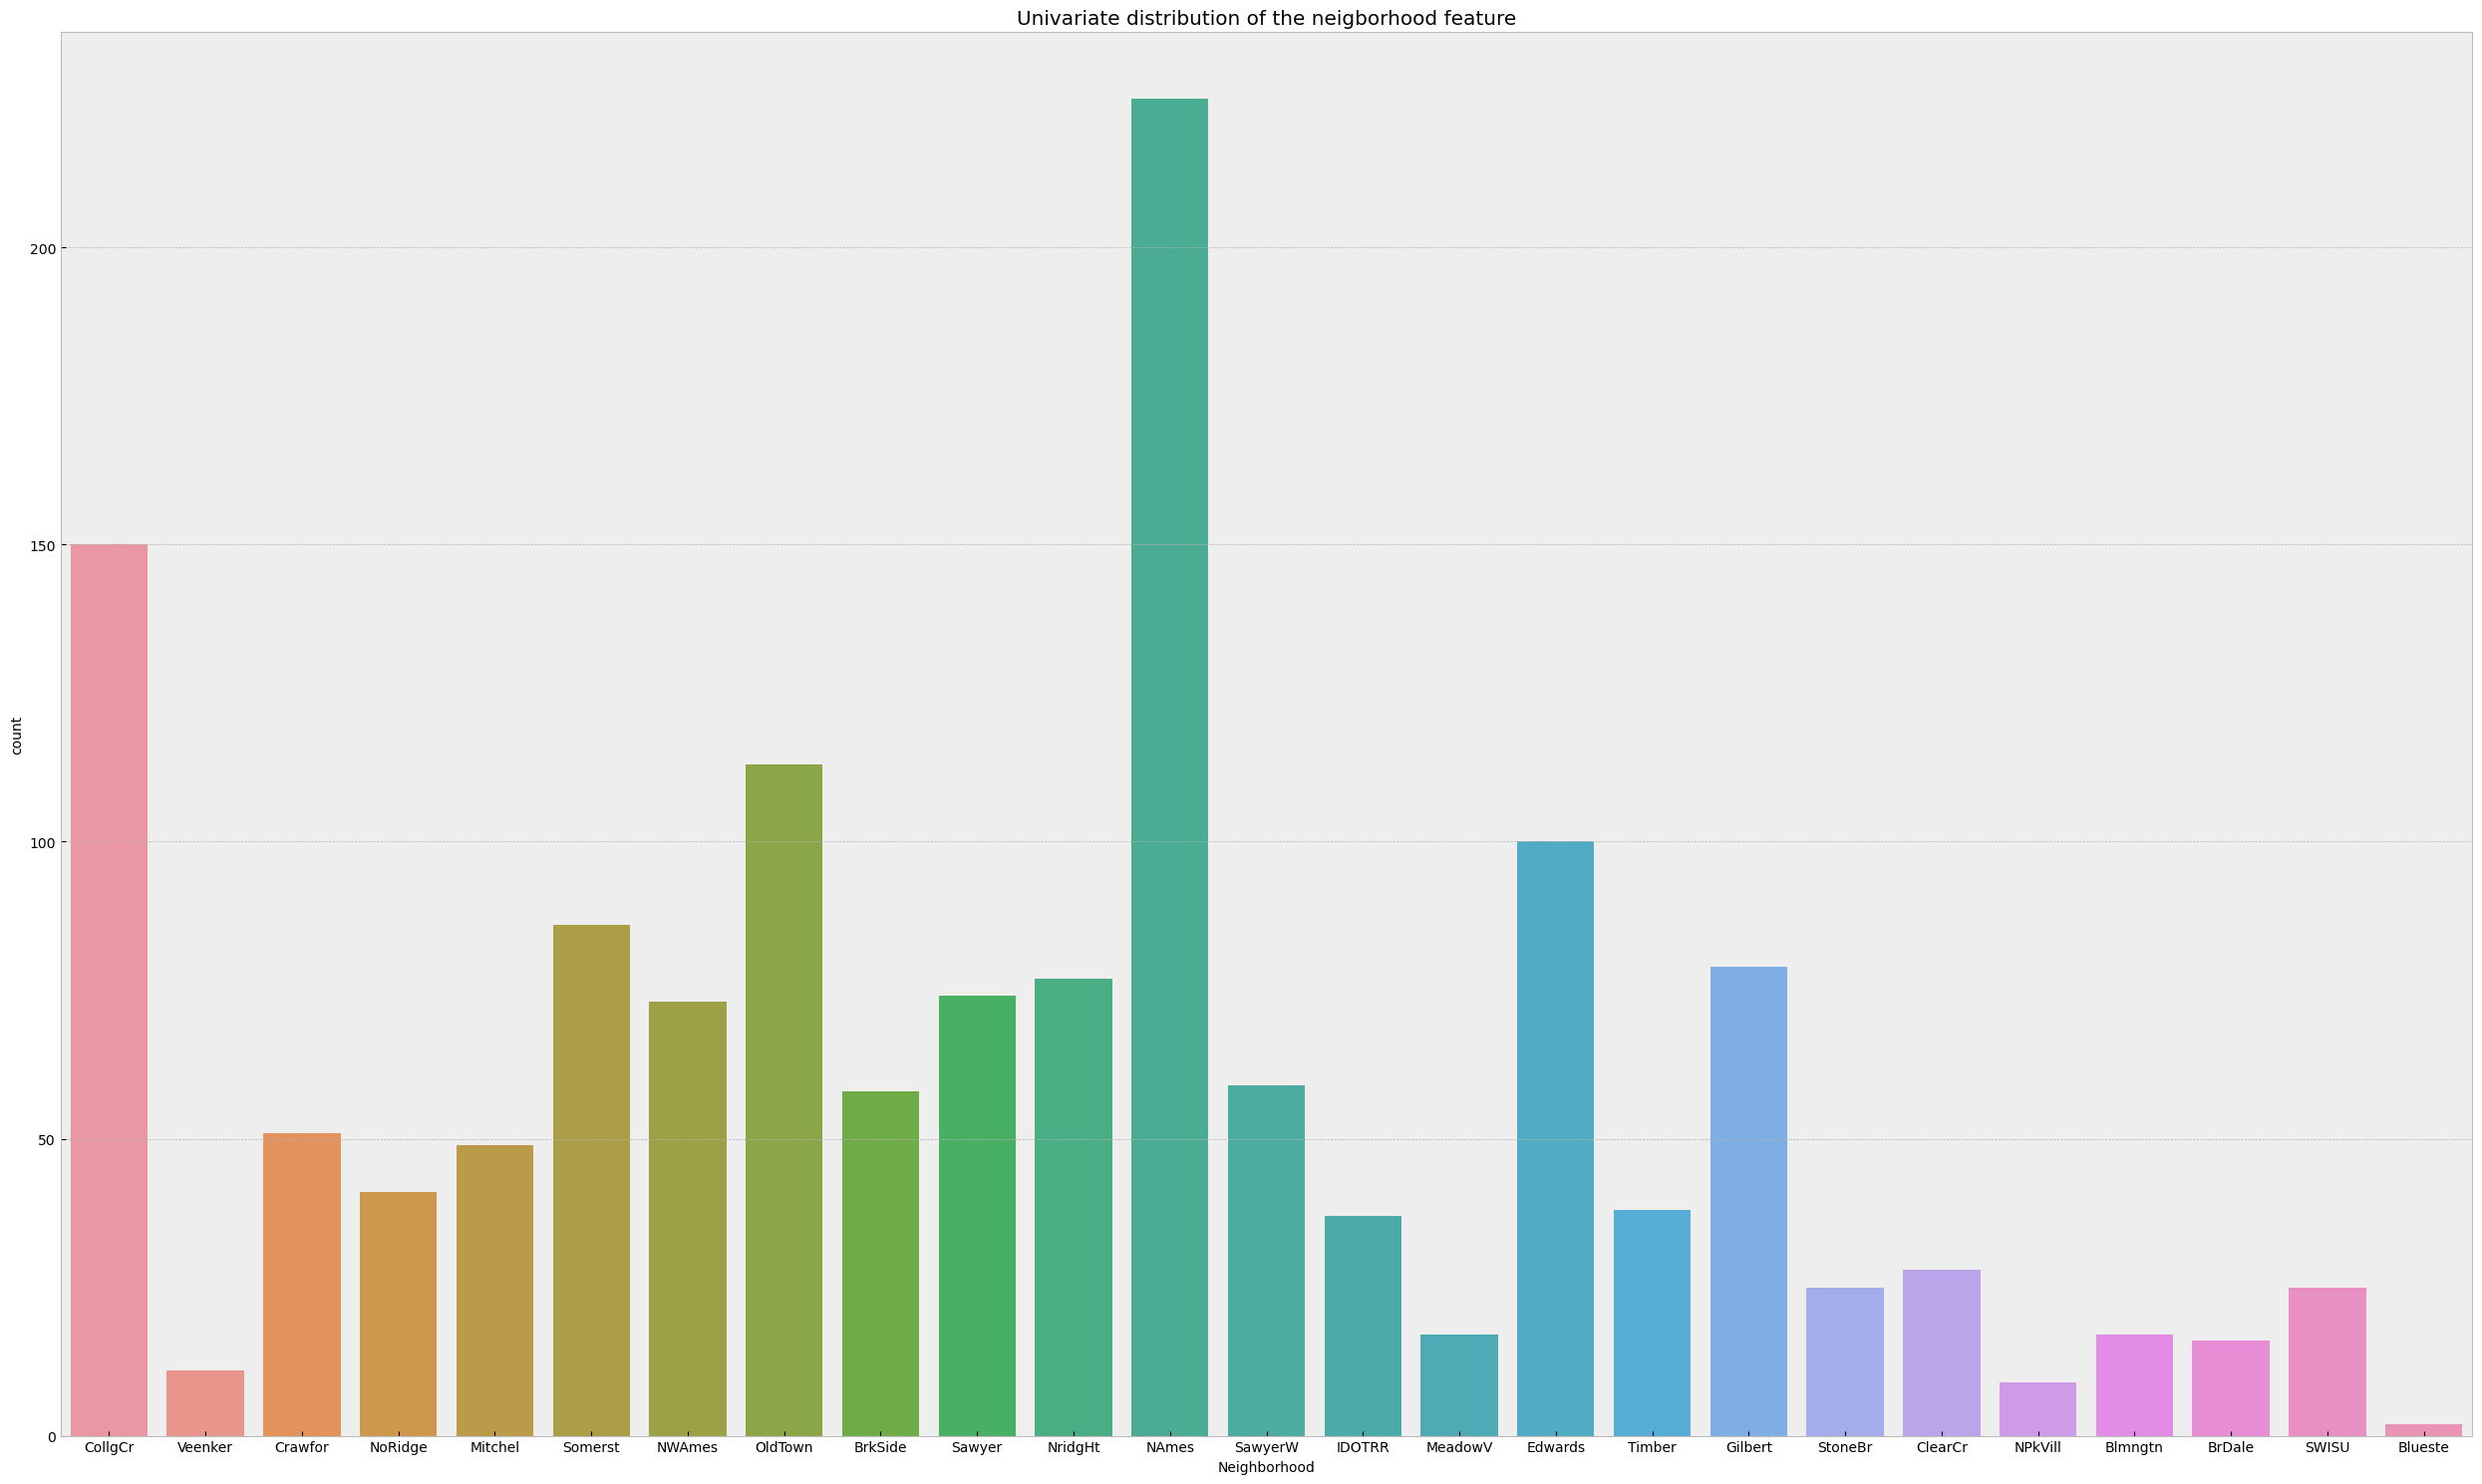

In [54]:
#univariate distribution of the categorical neigborhood feature
fig,ax = plt.subplots(figsize=(25,15))
sns.countplot(x='Neighborhood',data=cate_gori_cal_featrs)
ax.set_title('Univariate distribution of the neigborhood feature');
fig.tight_layout();

#### NAmes has the highest frequency in neighbourhood feature as shown in the univariate distribution.

In [61]:
# Checking for only categorical features
cate_gori_cal_featrs.describe()

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1  ... GarageType GarageFinish  \
count       1460         1460       1460  ...       1379         1379   
unique         3           25          9  ...          6            3   
top          Gtl        NAmes       Norm  ...     Attchd          Unf   
freq        1382          225       1260  ...        870          605   

       GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType  \
count        1379       1379       1460      7    281          54     1460   
unique          5          5          3      3      4           4        9   
top            TA         TA          Y     Gd  MnPrv        Shed       WD   
freq         1311       1326       1340      3    157          49     1267   

       SaleCondition  
count           1460  
unique             6  
top           Normal  
freq            1198  

[4 rows x 43 columns]

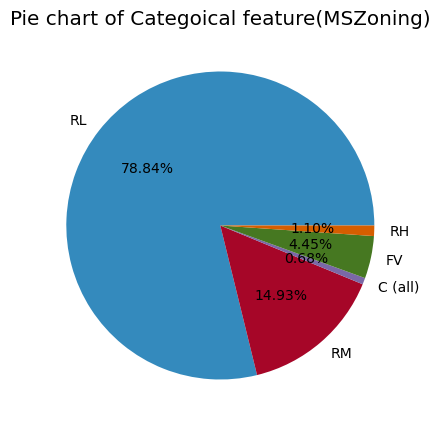

In [66]:
fig,ax = plt.subplots(figsize=(5,5))
count= Counter(df2['MSZoning'])
ax.pie(count.values(), labels=count.keys(), autopct= lambda p:f'{p:.2f}%')
ax.set_title('Pie chart of Categoical feature(MSZoning)');


#### RL(Residential Low Density) has the highest classification of sale while C (Commercial) has the lowest.

#### Bivariate Analysis 

#### Identifying the numerical features that are strongly correlated to SalePrice

In [12]:
correla_tion= num_ri_cal_featrs.corr()['SalePrice']
correla_tion1= correla_tion[correla_tion >= 0.5] 
correla_tion1

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
GarageCars      0.640409
GarageArea      0.623431
SalePrice       1.000000
Name: SalePrice, dtype: float64

#### Bivariate relationship between saleprice and some strongly correlated numerical features

<Figure size 900x500 with 0 Axes>

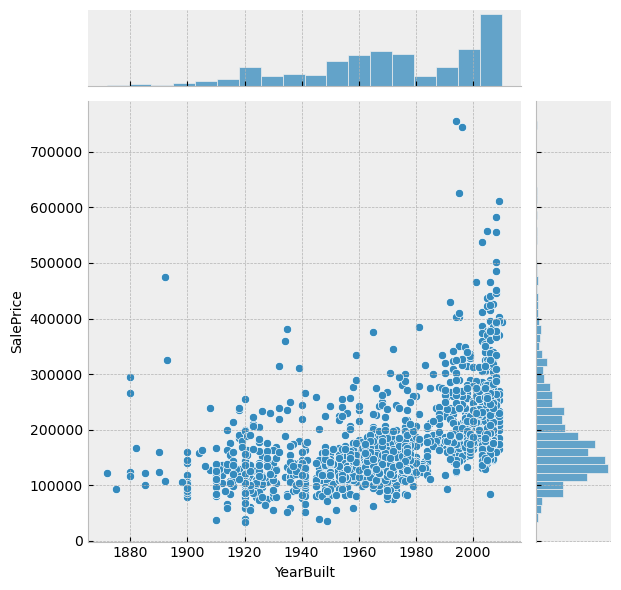

In [91]:
# Relationship between the sales price and year built.
plt.figure(figsize=(9,5))
sns.jointplot(x='YearBuilt',y='SalePrice',data=num_ri_cal_featrs)
ax.set_title('Sales Price vs Year Bullt')
plt.show();



There is positive linear relationship between the year a house was built and the sale price of the house, this is often a good indication that the year built feature is an important feature to determine the price of a house

<Figure size 900x500 with 0 Axes>

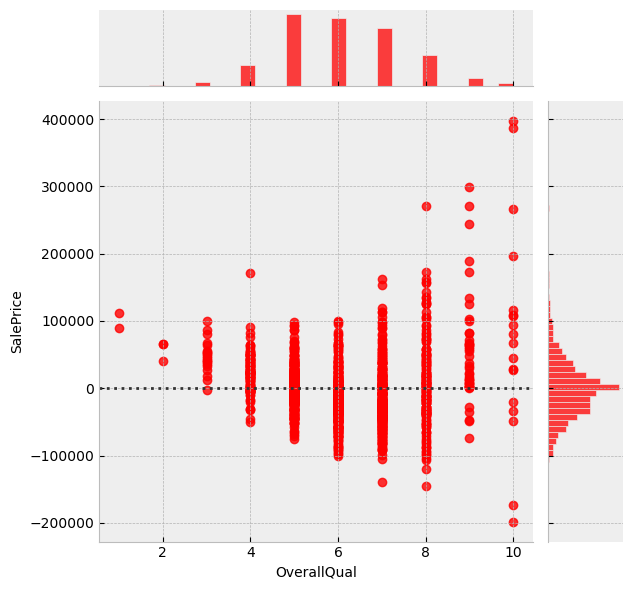

In [101]:
# Relationship between the sales price and overall quality.
plt.figure(figsize=(9,5))
sns.jointplot(x='OverallQual',y='SalePrice',data=num_ri_cal_featrs, kind= 'resid', color= 'r')
ax.set_title('Sales Price vs OverallQual')
plt.show();

There is positive linear relationship between the overall quality and the sale price of the house, this is often a good indication that overall quality feature is an important feature to determine the price of a house

<Figure size 900x500 with 0 Axes>

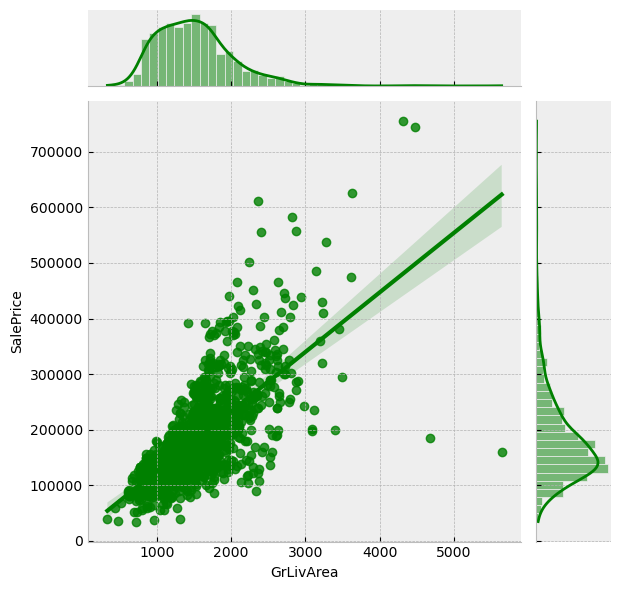

In [102]:
# Relationship between the sales price and above grade(ground).
plt.figure(figsize=(9,5))
sns.jointplot(x='GrLivArea',y='SalePrice',data=num_ri_cal_featrs, kind= 'reg', color= 'g')
ax.set_title('Sales Price vs GrLivArea')
plt.show();

There is positive linear relationship between the above grade ground and the sale price of the house, this is often a good indication that above grade ground feature is an important feature to determine the price of a house


Based on the positive linear relationship of year built, overall quality and above grade ground with sales price. It is evident that all other strongly correlated features will linearly and positively related to sales price. 

#### Bivariate analysis between dependent variable and categorical variables

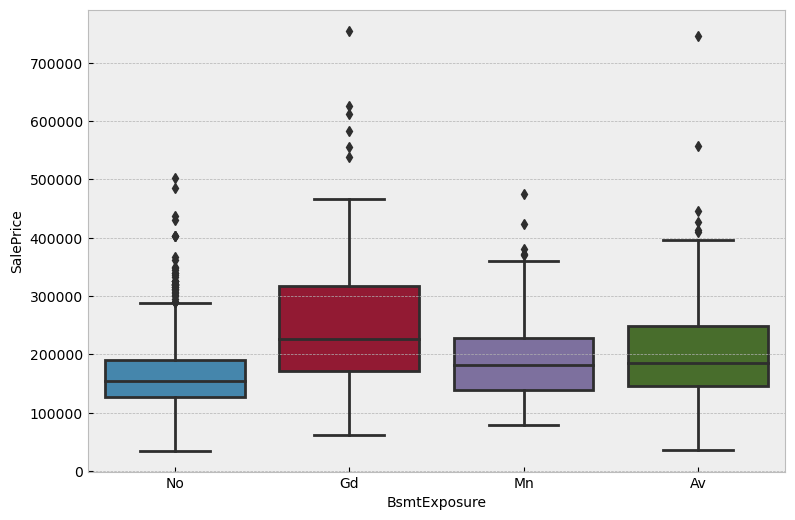

In [104]:
#bivariate analysis of the BsmtExposure vs SalePrice
plt.figure(figsize = (9, 6))
sns.boxplot(x='BsmtExposure', y='SalePrice', data=df2)
plt.show();

#### The bivariate analysis between BsmtExposure and SalesPrice shows that good exposure(Gd) has the highest sales price based on its highest median value, having outliers above 500000 while no exposure(No) has the minimum median value with sales price, having outliers below 300000. Though all the categories in BsmExposure have OUTLIERS corresponding to sales price.

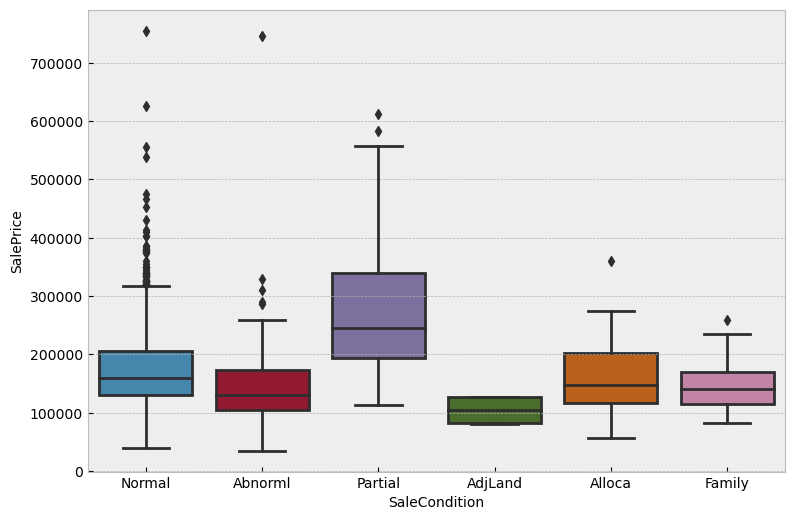

In [107]:
##bivariate analysis of the sales condition of house vs SalePrice
plt.figure(figsize = (9, 6))
sns.boxplot(x='SaleCondition', y='SalePrice', data=df2)
plt.show();

#### The bivariate analysis between sales condition and Sales price shows that partial has the highest sales price based on its highest median value, having outliers above 550000 while land adjacent has the minimum median value with sales price, having no outliers.

#### Multivariate Analysis

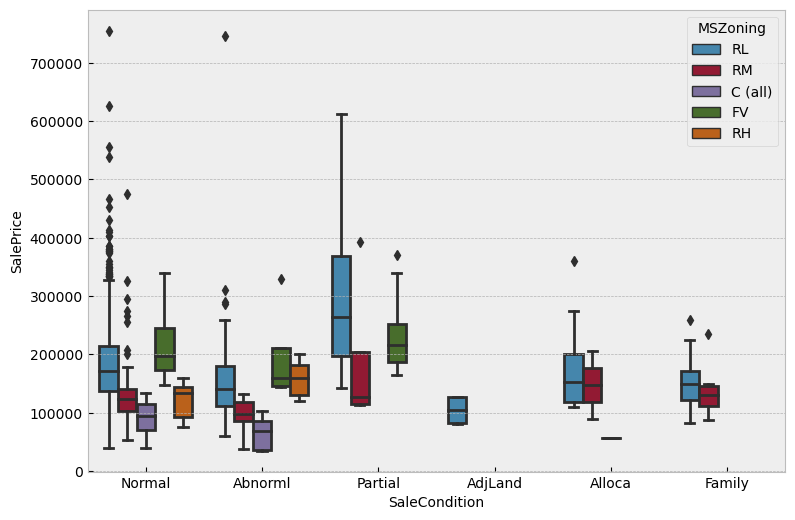

In [109]:
## Multivariate analysis of the sales condition of house and House zoning vs SalePrice
plt.figure(figsize = (9, 6))
sns.boxplot(x='SaleCondition', y='SalePrice', hue= 'MSZoning', data=df2)
plt.show();

#### The residential low density(RL) has the highest median value corresponding to the dependent feature(sales price), indicating highest impact on partial sales condition. While commercial(C) has the lowest median value corresponding to the dependent feature(sales price), indicating lowest impact on abnormal sales condition. Partial, adjland, alloca and family do not have zoning classification of sales

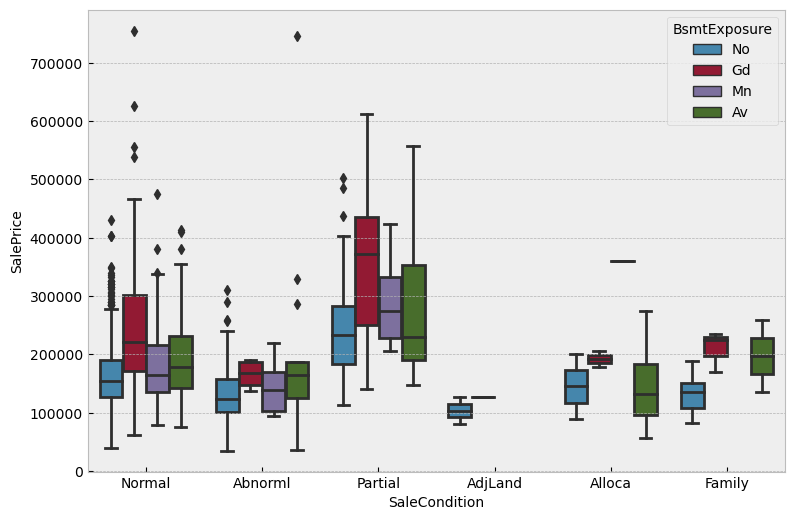

In [111]:
## Multivariate analysis of the sales condition of house and House zoning vs SalePrice
plt.figure(figsize = (9, 6))
sns.boxplot(x='SaleCondition', y='SalePrice', hue= 'BsmtExposure', data=df2)
plt.show();

#### The good exposure(Gd) has the highest median value corresponding to the dependent feature(sales price), indicating highest impact on partial sales condition. While no exposure(No) has the lowest median value corresponding to the dependent feature(sales price), indicating lowest impact on adjacent land sales condition. Adjland, alloca and family do not have all the exposure features.

In [ ]:
#### Identifying the correlation among the numerical features without inclusion of dependent variable(sales price) 

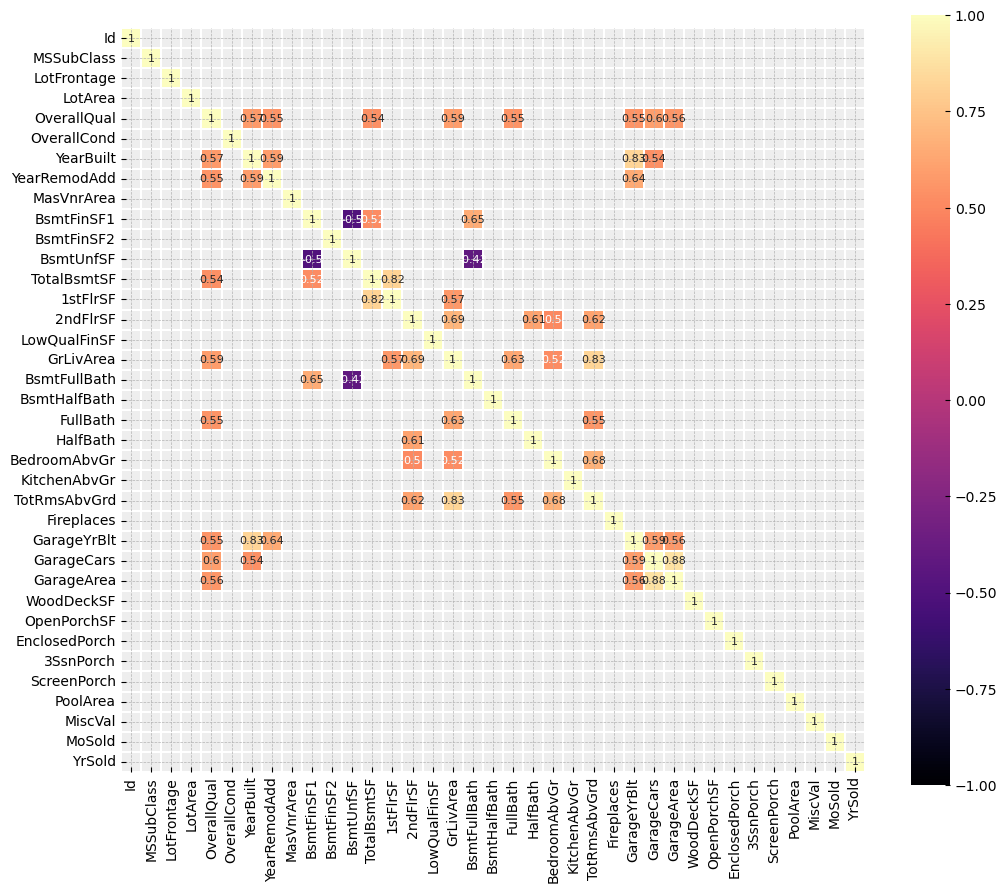

In [114]:
corr = num_ri_cal_featrs.drop('SalePrice', axis=1).corr() 
plt.figure(figsize=(12, 10))
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='magma', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

#### OBSERVATION: It is observed that overall quality has very strong positive correlations on the year house was built, remodel date, garage built, garage cars are fire places. And a lot of features seem to be positively correlated between each other as well. There is a strong negative correlation between BsmtUnfSF (Unfinished square feet of basement area) and BsmtFinSF2 (Type 2 finished square feet).

#### PANDAS PROFILING FOR EDA

In [119]:
from ydata_profiling import ProfileReport
profile= ProfileReport(df2,minimal=True)
profile.to_file("output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [120]:
profile

In [3]:
# Model Building Libraries
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
 

In [20]:
# Dataset Numerical distribution
num_ri_cal_featrs.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706  ...           0           61   
1          1976         0.0         978  ...         298            0   
2          2002       162.0         486  ...           0           42   
3          1970         0.0         216  ...           0           35   
4          2000       350.0         655  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 38 columns]

In [55]:
# Checking for missing data points
cate_gori_cal_featrs.head()

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2  ... KitchenQual Functional FireplaceQu  \
0      CollgCr       Norm       Norm  ...          Gd        Typ         NaN   
1      Veenker      Feedr       Norm  ...          TA        Typ          TA   
2      CollgCr       Norm       Norm  ...          Gd        Typ          TA   
3      Crawfor       Norm       Norm  ...          Gd        Typ          Gd   
4      NoRidge       Norm       Norm  ...          Gd        Typ          TA   

  GarageType GarageFinish GarageQual GarageCond PavedDrive SaleType  \
0     Attchd          RFn         TA         TA          Y       WD   
1     Attchd          RFn         TA         TA          Y       WD   
2     Attchd          RFn         TA         TA          Y       WD   
3     Detchd          Unf         TA         TA          Y       WD   
4     Attchd          RFn         TA         TA          Y       WD   

  SaleCondition  
0        Normal  
1        Normal  
2        Normal  
3       Abnorml  
4        Normal  

[5 rows x 39 columns]

In [19]:
# Identifying missing data in categorical distribution
cate_gori_cal_featrs.isnull().sum()

MSZoning           0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
KitchenQual        0
Functional         0
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PavedDrive         0
SaleType           0
SaleCondition      0
dtype: int64

In [22]:
# Imputation of missing data points in categorical distribution
from sklearn.impute import SimpleImputer
# Method initialization
imputer = SimpleImputer(strategy='most_frequent')
# Imputation of the missing data
cate_gori_cal_featrs_imputed = pd.DataFrame(imputer.fit_transform(cate_gori_cal_featrs),columns=cate_gori_cal_featrs.columns)


In [18]:
# Imputation of missing data points in numerical distribution
from sklearn.impute import SimpleImputer
# Initialization of imputation library
imputer= SimpleImputer(strategy='median')
# Imputating the data
num_ri_cal_featrs_imputed= pd.DataFrame(imputer.fit_transform(num_ri_cal_featrs),columns=num_ri_cal_featrs.columns) 

In [111]:
num_ri_cal_featrs_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1460 non-null   float64
 1   1       1460 non-null   float64
 2   2       1460 non-null   float64
 3   3       1460 non-null   float64
 4   4       1460 non-null   float64
 5   5       1460 non-null   float64
 6   6       1460 non-null   float64
 7   7       1460 non-null   float64
 8   8       1460 non-null   float64
 9   9       1460 non-null   float64
 10  10      1460 non-null   float64
 11  11      1460 non-null   float64
 12  12      1460 non-null   float64
 13  13      1460 non-null   float64
 14  14      1460 non-null   float64
 15  15      1460 non-null   float64
 16  16      1460 non-null   float64
 17  17      1460 non-null   float64
 18  18      1460 non-null   float64
 19  19      1460 non-null   float64
 20  20      1460 non-null   float64
 21  21      1460 non-null   float64
 22  

In [23]:
# Concatenation of categorical and numerical distribution
concat_feats= pd.concat([num_ri_cal_featrs_imputed,cate_gori_cal_featrs_imputed], axis=1)
concat_feats

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1.0        60.0         65.0   8450.0          7.0          5.0   
1        2.0        20.0         80.0   9600.0          6.0          8.0   
2        3.0        60.0         68.0  11250.0          7.0          5.0   
3        4.0        70.0         60.0   9550.0          7.0          5.0   
4        5.0        60.0         84.0  14260.0          8.0          5.0   
...      ...         ...          ...      ...          ...          ...   
1455  1456.0        60.0         62.0   7917.0          6.0          5.0   
1456  1457.0        20.0         85.0  13175.0          6.0          6.0   
1457  1458.0        70.0         66.0   9042.0          7.0          9.0   
1458  1459.0        20.0         68.0   9717.0          5.0          6.0   
1459  1460.0        20.0         75.0   9937.0          5.0          6.0   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  KitchenQual  \
0        2003.0        2003.0       196.0       706.0  ...           Gd   
1        1976.0        1976.0         0.0       978.0  ...           TA   
2        2001.0        2002.0       162.0       486.0  ...           Gd   
3        1915.0        1970.0         0.0       216.0  ...           Gd   
4        2000.0        2000.0       350.0       655.0  ...           Gd   
...         ...           ...         ...         ...  ...          ...   
1455     1999.0        2000.0         0.0         0.0  ...           TA   
1456     1978.0        1988.0       119.0       790.0  ...           TA   
1457     1941.0        2006.0         0.0       275.0  ...           Gd   
1458     1950.0        1996.0         0.0        49.0  ...           Gd   
1459     1965.0        1965.0         0.0       830.0  ...           TA   

      Functional  FireplaceQu  GarageType  GarageFinish  GarageQual  \
0            Typ           Gd      Attchd           RFn          TA   
1            Typ           TA      Attchd           RFn          TA   
2            Typ           TA      Attchd           RFn          TA   
3            Typ           Gd      Detchd           Unf          TA   
4            Typ           TA      Attchd           RFn          TA   
...          ...          ...         ...           ...         ...   
1455         Typ           TA      Attchd           RFn          TA   
1456        Min1           TA      Attchd           Unf          TA   
1457         Typ           Gd      Attchd           RFn          TA   
1458         Typ           Gd      Attchd           Unf          TA   
1459         Typ           Gd      Attchd           Fin          TA   

      GarageCond  PavedDrive  SaleType  SaleCondition  
0             TA           Y        WD         Normal  
1             TA           Y        WD         Normal  
2             TA           Y        WD         Normal  
3             TA           Y        WD        Abnorml  
4             TA           Y        WD         Normal  
...          ...         ...       ...            ...  
1455          TA           Y        WD         Normal  
1456          TA           Y        WD         Normal  
1457          TA           Y        WD         Normal  
1458          TA           Y        WD         Normal  
1459          TA           Y        WD         Normal  

[1460 rows x 77 columns]

In [30]:
# Feature Engineering(Segmentation)
x= concat_feats.drop('SalePrice', axis=1)
target= concat_feats['SalePrice']

In [31]:
# Converting categorical to numerical distribution: Encoding
# Method Initializtion
from sklearn.preprocessing import LabelEncoder
# Instantiating tthe method
encoder= LabelEncoder()
# looping in columns
for i in x.columns:
    if(x[i].dtype=='object'):
        x[i]= encoder.fit_transform(x[i])
    else:
        x[i]=x[i]
x.head()

    

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0  1.0        60.0         65.0   8450.0          7.0          5.0     2003.0   
1  2.0        20.0         80.0   9600.0          6.0          8.0     1976.0   
2  3.0        60.0         68.0  11250.0          7.0          5.0     2001.0   
3  4.0        70.0         60.0   9550.0          7.0          5.0     1915.0   
4  5.0        60.0         84.0  14260.0          8.0          5.0     2000.0   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  KitchenQual  Functional  \
0        2003.0       196.0       706.0  ...            2           6   
1        1976.0         0.0       978.0  ...            3           6   
2        2002.0       162.0       486.0  ...            2           6   
3        1970.0         0.0       216.0  ...            2           6   
4        2000.0       350.0       655.0  ...            2           6   

   FireplaceQu  GarageType  GarageFinish  GarageQual  GarageCond  PavedDrive  \
0            2           1             1           4           4           2   
1            4           1             1           4           4           2   
2            4           1             1           4           4           2   
3            2           5             2           4           4           2   
4            4           1             1           4           4           2   

   SaleType  SaleCondition  
0         8              4  
1         8              4  
2         8              4  
3         8              0  
4         8              4  

[5 rows x 76 columns]

In [32]:
# Scaling the dataset using library
from sklearn.preprocessing import RobustScaler
# Method Initialization
scaler= RobustScaler()
x_scaled= scaler.fit_transform(x)
#x_scaled


In [33]:
# Splitting the data to training and evaluation sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(x_scaled, target, test_size=0.33, random_state=42)

# Model Building
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Method Initialization
linear_reg= LinearRegression()
ridge= Ridge()
decision_t= DecisionTreeRegressor()
grad_boost= GradientBoostingRegressor()

# Fitting for model training
linear_reg.fit(X_train,y_train)
ridge.fit(X_train,y_train)
decision_t.fit(X_train,y_train)
grad_boost.fit(X_train,y_train)

# Model Prediction
linear_pred= linear_reg.predict(X_test)
ridge_pred= ridge.predict(X_test)
decision_pred= decision_t.predict(X_test)
grad_pred= grad_boost.predict(X_test)

# Model Evaluation Performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Model Evaluation Performance Analysis
# Simplifying the models
model= ['linear regression', 'ridge', 'decision tree', 'gradient boosting']
mean_ab= mean_absolute_error(y_test,linear_pred)
mean_sq= mean_squared_error(y_test,linear_pred)
r_mean_sq= np.sqrt(mean_sq)
r_2= r2_score(y_test,linear_pred)
# Printing of evaluation metrics for Linear regression
print('Linear Regression')
print(f'The mean absolute error for {model[0]} is {mean_ab}')
print(f'The mean squared error for {model[0]} is {mean_sq}')
print(f'The r squared for {model[0]} is {r_2}')
print(f'The root mean squared error for {model[0]} is {r_mean_sq}')













Linear Regression
The mean absolute error for linear regression is 22529.668657294795
The mean squared error for linear regression is 1415491694.2186556
The r squared for linear regression is 0.807190268888707
The root mean squared error for linear regression is 37623.020801347884


In [35]:
# Printing of evaluation metrics for Ridge
mean_ab= mean_absolute_error(y_test,ridge_pred)
mean_sq= mean_squared_error(y_test,ridge_pred)
r_mean_sq= np.sqrt(mean_sq)
r_2= r2_score(y_test,ridge_pred)
print('Ridge')
print(f'The mean absolute error for {model[1]} is {mean_ab}')
print(f'The mean squared error for {model[1]} is {mean_sq}')
print(f'The r squared for {model[1]} is {r_2}')
print(f'The root mean squared error for {model[1]} is {r_mean_sq}')



Ridge
The mean absolute error for ridge is 22468.99985583469
The mean squared error for ridge is 1410597375.3415937
The r squared for ridge is 0.8078569434516971
The root mean squared error for ridge is 37557.92027444536


In [36]:
# Printing of evaluation metrics for Decision Tree
mean_ab= mean_absolute_error(y_test,decision_pred)
mean_sq= mean_squared_error(y_test,decision_pred)
r_mean_sq= np.sqrt(mean_sq)
r_2= r2_score(y_test,decision_pred)
print('Decision Tree')
print(f'The mean absolute error for {model[2]} is {mean_ab}')
print(f'The mean squared error for {model[2]} is {mean_sq}')
print(f'The r squared for {model[2]} is {r_2}')
print(f'The root mean squared error for {model[2]} is {r_mean_sq}')

Decision Tree
The mean absolute error for decision tree is 28381.358921161827
The mean squared error for decision tree is 2090232747.5912864
The r squared for decision tree is 0.7152811170357601
The root mean squared error for decision tree is 45719.063284272204


In [37]:
# Printing of evaluation metrics for Gradient Boosting
mean_ab= mean_absolute_error(y_test,grad_pred)
mean_sq= mean_squared_error(y_test,grad_pred)
r_mean_sq= np.sqrt(mean_sq)
r_2= r2_score(y_test,grad_pred)
print('Gradient Boosting')
print(f'The mean absolute error for {model[3]} is {mean_ab}')
print(f'The mean squared error for {model[3]} is {mean_sq}')
print(f'The r squared for {model[3]} is {r_2}')
print(f'The root mean squared error for {model[3]} is {r_mean_sq}')


Gradient Boosting
The mean absolute error for gradient boosting is 16760.535631522605
The mean squared error for gradient boosting is 936449959.8590451
The r squared for gradient boosting is 0.872442441239989
The root mean squared error for gradient boosting is 30601.46989703346


## OBSERVATION
. I can identify the best performing model(Gradient boosting) having an r2 score 0.87. The model most fits the data compared with other models

. Gradient boosting model has the smallest loss error in comparison with other the mean absolute error and mean squared error of other models. The model has average loss of predicted value 16760 from the actual house price    

## RECOMMENDATIONS AND CONCLUSION
. I trained these models with data outliers and still present better predictions. It is recommended to train without outliers to   identify may be there will be a better performance outcome.

. More feature engineering should be done to improve dataset

. A good recommendation for the linear based model to check the regression assumptions

. Hyper parameter tuning to improve the performance of the best model

. Productionizing the best model to deploy
